In [70]:
from sklearn import datasets, cross_validation, tree, ensemble
import math
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
#Load data
cv=10
digits = datasets.load_digits()

In [21]:
#Create training datasets
X = digits['data']
y = digits['target']

In [24]:
#Estimate with basic Decision Tree
stimator = tree.DecisionTreeClassifier()
estimator.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
result_1 = cross_validation.cross_val_score(estimator=estimator, X=X, y=y, cv=cv)
print(result_1.mean())

0.832067898955


In [51]:
#Estimate with bagging
estimator = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=100)
estimator.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [52]:
result_2 = cross_validation.cross_val_score(estimator=estimator, X=X, y=y, cv=cv)
print(result_2.mean())

0.925393836495


In [54]:
#Using sqrt(d) attributes
estimator = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=100, max_features = int(math.sqrt(X.shape[1])))
estimator.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=8,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [55]:
result_3 = cross_validation.cross_val_score(estimator=estimator, X=X, y=y, cv=cv)
print(result_3.mean())

0.928346655979


In [60]:
#random features for each branch
estimator = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_features=int(math.sqrt(X.shape[1]))), 
                                       n_estimators=100)
estimator.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [61]:
result_4 = cross_validation.cross_val_score(estimator=estimator, X=X,y=y, cv=cv)
print(result_4.mean())

0.947776030449


In [66]:
#Compare with Random Forest
estimator = ensemble.RandomForestClassifier(max_features=int(math.sqrt(X.shape[1])),n_estimators=100)
estimator.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
random_forest_pf = cross_validation.cross_val_score(estimator=estimator, X=X,y=y,cv=cv)
print(random_forest_pf.mean())

0.954886098223


In [68]:
n_estimators = [1,5,10,15,50,75,100,125,150,200,300,400,500]
performance_n_est = []
for i in n_estimators:
    estimator = ensemble.RandomForestClassifier(n_estimators=i)
    estimator.fit(X,y)
    current_forest_pf = cross_validation.cross_val_score(estimator=estimator, X=X,y=y, cv=cv)
    performance_n_est.append(current_forest_pf.mean())

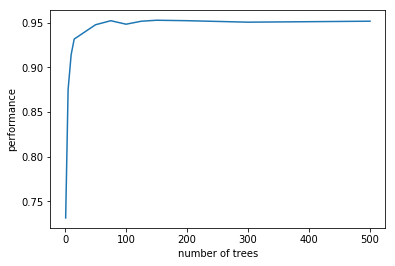

In [71]:
pylab.plot(n_estimators, performance_n_est)
pylab.xlabel('number of trees')
pylab.ylabel('performance')

In [77]:
n_features = [1,5,10,15,20,25,30,35,40,45,50,55,60,64]
performance_n_feat = []
for i in n_features:
    current_forest_pf = cross_validation.cross_val_score(estimator=ensemble.RandomForestClassifier(max_features=i), X=X,y=y,cv=cv)
    performance_n_feat.append(current_forest_pf.mean())

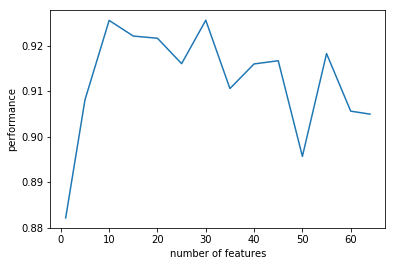

In [79]:
pylab.plot(n_features, performance_n_feat)
pylab.xlabel('number of features')
pylab.ylabel('performance')

In [80]:
depth = [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]
performance_depth = []
for i in depth:
    current_forest_pf=cross_validation.cross_val_score(estimator=ensemble.RandomForestClassifier(max_depth=i),
                                                      X=X,y=y,cv=cv)
    performance_depth.append(current_forest_pf.mean())

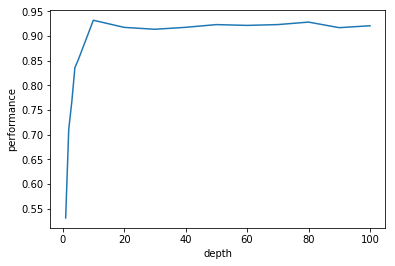

In [81]:
pylab.plot(depth, performance_depth)
pylab.xlabel('depth')
pylab.ylabel('performance')